# 1. Import thư viện và các dependencies

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

# 2. Khởi tạo các hằng số

In [ ]:

 
path = "myData" # folder with all the class folders
labelFile = 'labels.csv' # file with all names of classes
batch_size_val=32  # how many to process together
steps_per_epoch_val=100
epochs_val=1
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation

# 3. Import các ảnh trong dataset

In [ ]:


count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

# 4. Split các ảnh

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = chứa các ảnh
# y_train = ID của các lớp

# 5. Kiểm tra số lượng ảnh có bằng số lượng các label

In [ ]:

print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"
 
 
# READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

# 6. Hiển thị ảnh trong class

In [ ]:

num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

# 7. Tiền xử lý ảnh

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)
data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>
[114, 1259, 1280, 814, 1076, 1074, 235, 817, 837, 851, 1150, 776, 1195, 1231, 434, 342, 250, 620, 694, 113, 193, 179, 222, 290, 155, 858, 339, 141, 305, 148, 237, 435, 134, 387, 216, 675, 220, 120, 1198, 172, 210, 137, 138]


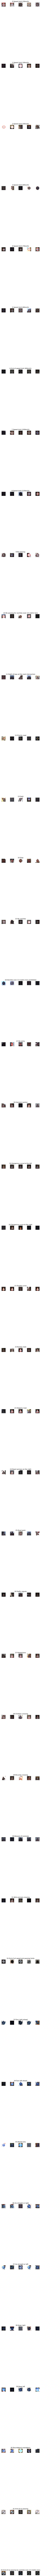

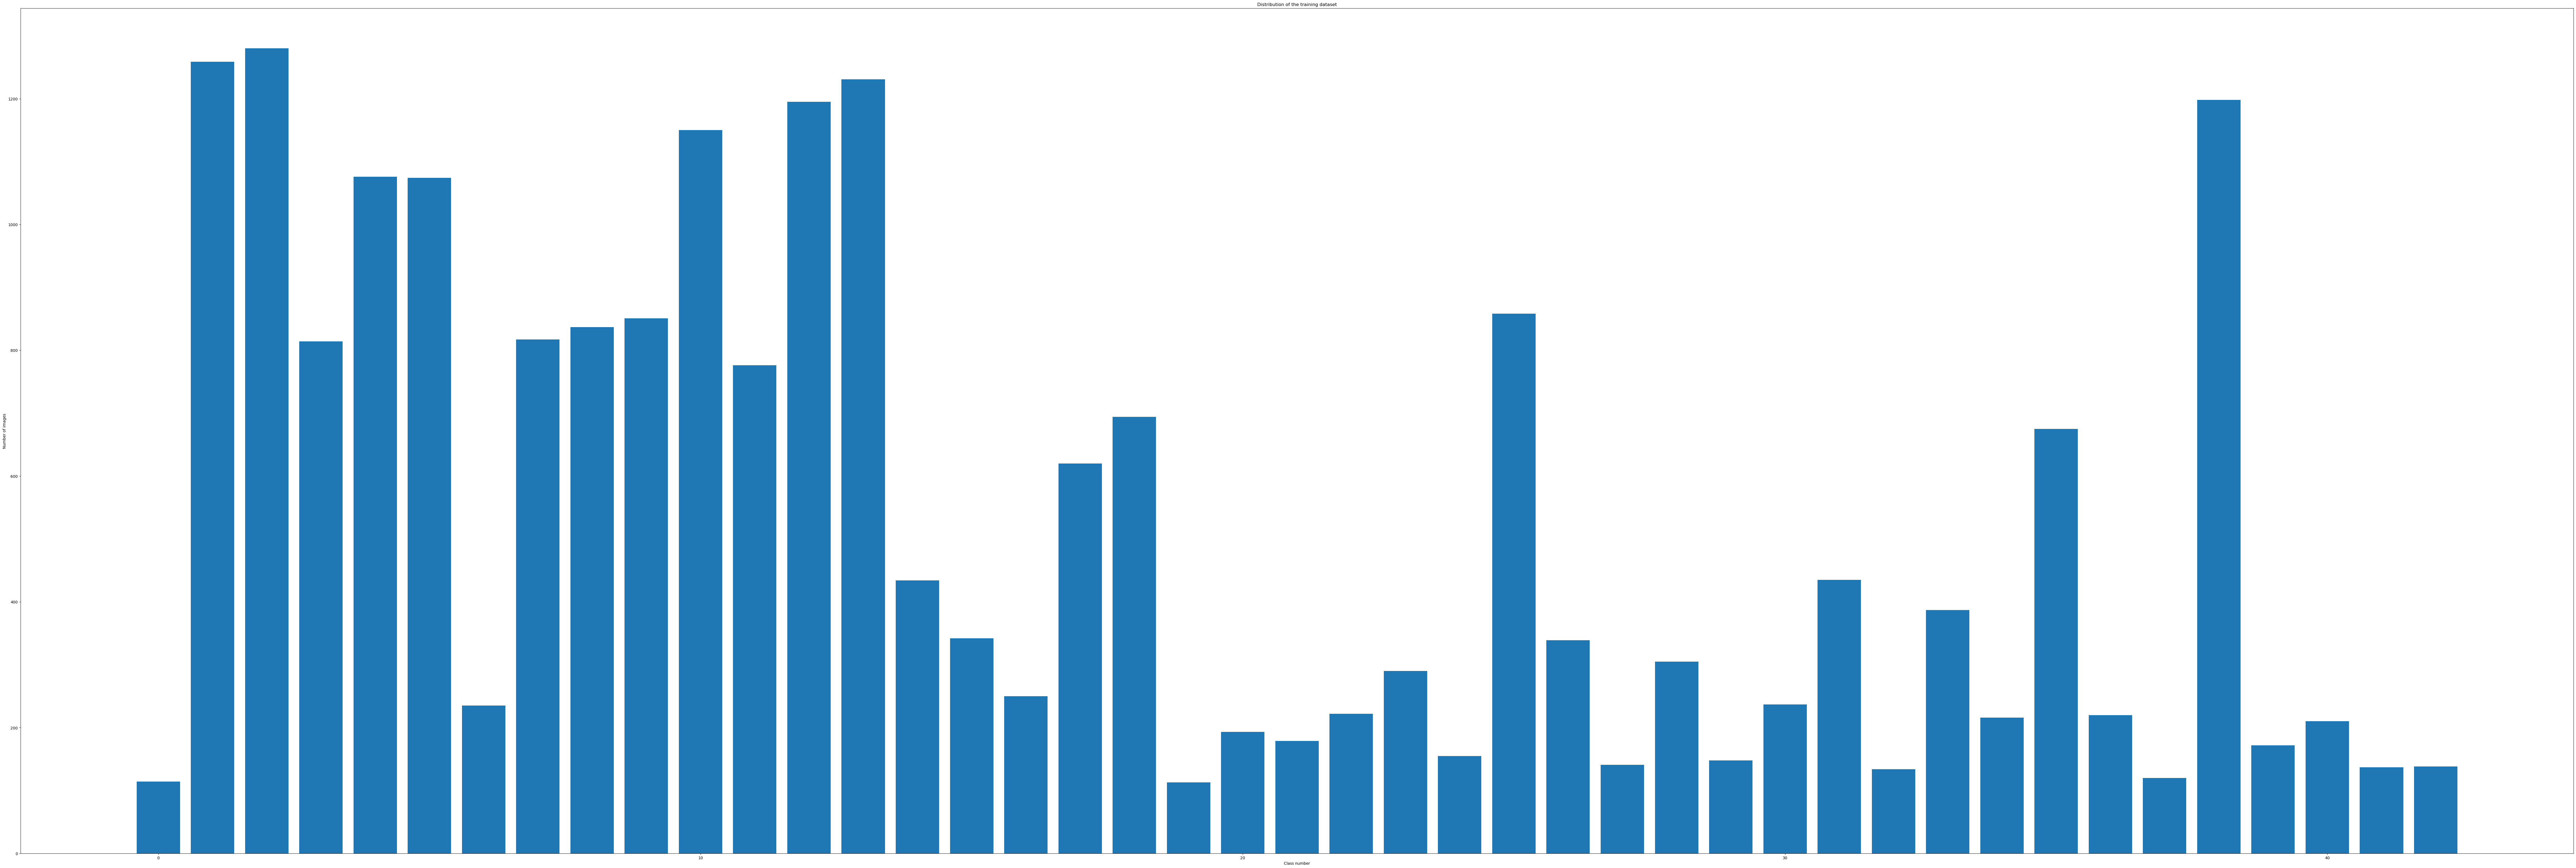

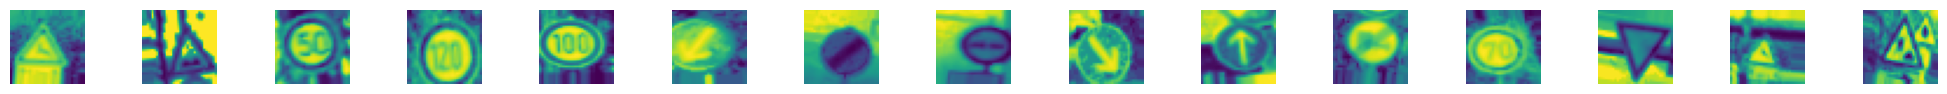

In [8]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE 
 
# ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 
 
# AUGMENTATAION OF IMAGES:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NUMBER OF IMAGES CREATED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

# 8. Train model bằng CNN

In [9]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # Kernal chuyen dong quanh anh de lay cac dac diem
                         # Tru ra hai pixels o goc de lay cac dac diem
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # so luong node trong hidden layer
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) 

    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(noOfClasses,activation='softmax')) 
    # COMPILE MODEL
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

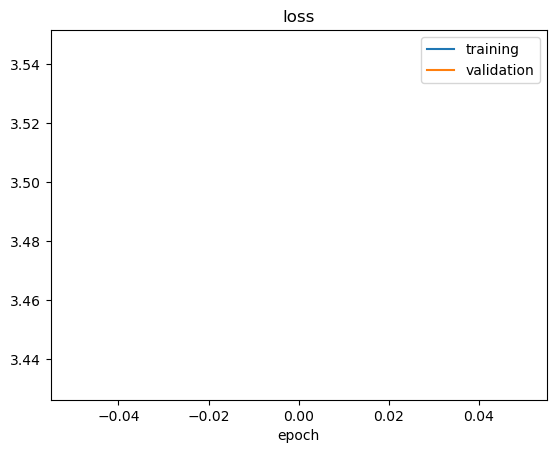

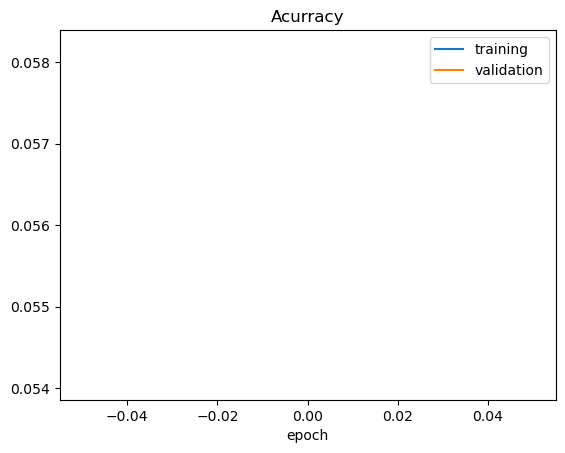

Test Score: 3.435788154602051
Test Accuracy: 0.05704022943973541


In [10]:
# TRAIN MODEL
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

# PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

# 9. Xử lý ảnh theo thời gian thực

In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [15]:
import numpy as np
import cv2
import tensorflow_datasets as tfds
import tensorflow as tf
 
#############################################
 
frameWidth= 640        # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75      
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP VIDEO CAMERA
cap = cv2.VideoCapture(2)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

False

In [ ]:
# IMPORT THE TRANNIED MODEL

saved_model_path = 'tmp/tf_save'
tf.saved_model.save(model, saved_model_path)
DEFAULT_FUNCTION_KEY = 'serving_default'
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Gioi han toc do (20km/h)'
    elif classNo == 1: return 'Gioi han toc do (30km/h)'
    elif classNo == 2: return 'Gioi han toc do (50km/h)'
    elif classNo == 3: return 'Gioi han toc do (60 km/h)'
    elif classNo == 4: return 'Gioi han toc do (70 km/h)'
    elif classNo == 5: return 'Gioi han toc do (80 km/h)'
    elif classNo == 6: return 'Het gioi han toc do (80 km/h)'
    elif classNo == 7: return 'Gioi han toc do (100 km/h)'
    elif classNo == 8: return 'Gioi han toc do (120 km/h)'
    elif classNo == 9: return 'Cam vuot'
    elif classNo == 10: return 'Cam vuot xe trn 3,5 tan'
    elif classNo == 11: return 'Quyen uu tin tai giao lo tiep theo'
    elif classNo == 12: return 'duong uu tin'
    elif classNo == 13: return 'nang suat'
    elif classNo == 14: return 'Dung lai'
    elif classNo == 15: return 'khong ci phuong tien'
    elif classNo == 16: return 'Cam xe trn 3,5 tan'
    elif classNo == 17: return 'Cam vo'
    elif classNo == 18: return 'Than trong chung'
    elif classNo == 19: return 'Khc cua nguy hiem bn tri'
    elif classNo == 20: return 'Khc cua nguy hiem bn phai '
    elif classNo == 21: return 'duong cong doi'
    elif classNo == 22: return 'Con duong gap ghenh'
    elif classNo == 23: return 'duong tron truot'
    elif classNo == 24: return 'Con duong hep lai bn phai'
    elif classNo == 25: return 'lm duong'
    elif classNo == 26: return 'Tin hieu giao thong'
    elif classNo == 27: return 'nguoi di bo'
    elif classNo == 28: return 'tre em qua duong'
    elif classNo == 29: return 'Xe dap qua duong'
    elif classNo == 30: return 'Coi chung bang/tuyet'
    elif classNo == 31: return 'Dong vat hoang d bang qua'
    elif classNo == 32: return 'Ket thc tat ca cc gioi han toc do v vuot qua'
    elif classNo == 33: return 'Re phai ve phia truoc'
    elif classNo == 34: return 'Re tri phia truoc'
    elif classNo == 35: return 'Chi di thang'
    elif classNo == 36: return 'Di thang hoac phai'
    elif classNo == 37: return 'Di thang hoac tri'
    elif classNo == 38: return 'Di bn phai'
    elif classNo == 39: return 'Giu bn tri'
    elif classNo == 40: return 'Bat buoc di vong xuyen'
    elif classNo == 41: return 'Ket thc khong di qua'
    elif classNo == 42: return 'Het duong cam xe trn 3,5 tan di qua'

while True:
 
# READ IMAGE
    success, imgOrignal = cap.read()
 
# PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = np.argmax(predictions,axis=1)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
    #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(0) and 0xFF == ord('q'):
        break